In [1]:
%matplotlib inline

# Basic imports

In [21]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Plotting details

In [22]:
import matplotlib
###Default for jupyter display
matplotlib.rcParams['figure.dpi']= 150

matplotlib.rcParams['xtick.labelsize'] = 7
matplotlib.rcParams['ytick.labelsize'] = 7
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['axes.titlesize'] = 7

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True
# matplotlib.rcParams['text.usetex'] = True

matplotlib.rcParams['legend.fontsize'] = 7
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1
matplotlib.rcParams['legend.handletextpad'] = 0.4



prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [23]:
###Load classifier model
clf = joblib.load('../Data/classifier_data/rf_version_updating.joblib')

# ###Load datasets
train_df = pd.read_csv('../Data/classifier_data/train_df.csv', index_col=0)
print(train_df.shape)
test_df = pd.read_csv('../Data/classifier_data/test_df.csv', index_col=0)
print(test_df.shape)

(634, 229)
(423, 229)


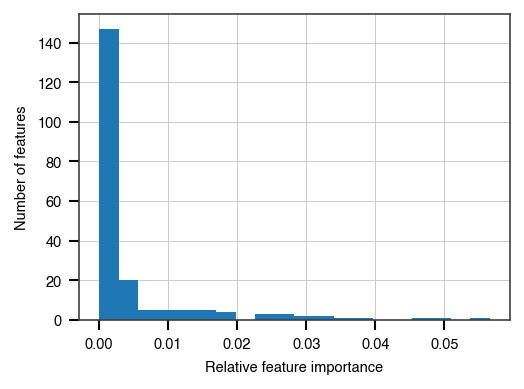

In [106]:
fig, ax = plt.subplots(figsize=(3.7, 2.7))
ax.hist(clf.feature_importances_, 20) 
ax.set_xlabel('Relative feature importance')
ax.set_ylabel('Number of features')
plt.savefig('../Manuscript/SI_fig_importance.png', dpi=300, bbox_inches='tight')

In [33]:
print('This should be 1:', sum(clf.feature_importances_))
print('How many features were useless:', len([i for i in clf.feature_importances_ if i == 0]))

This should be 1: 0.9999999999999998
How many features were useless: 6


In [97]:
domain_df = pd.read_csv('../Data/protein_domain_data/cddid_selected_2020_4_27.tsv', sep='\t', index_col=0)
print(domain_df.shape)

zippy = list(zip(train_df.columns[23:], clf.feature_importances_))
feature_import_df = pd.DataFrame(zippy)
feature_import_df.columns = ['name', 'feature_importance']
print(feature_import_df.shape)

domain_df = domain_df.merge(feature_import_df, left_on='1', right_on='name', how='outer')
domain_df = domain_df.drop(['name'], axis=1)
domain_df = domain_df.sort_values(by=['feature_importance'], ascending=False)

print(domain_df.shape)
domain_df.head()

(371, 12)
(206, 2)
(371, 13)


,1,2,3,4,integrase,excisionase,recombinase,transposase,lysogen,temperate,parA|ParA|parB|ParB,search_hits,feature_importance
234,pfam04606,Ogr_Delta,Ogr/Delta-like zinc finger. This is a viral fa...,47,0,0,1,0,0,0,0,1,0.056585
312,pfam13408,Zn_ribbon_recom,Recombinase zinc beta ribbon domain. This shor...,58,0,0,1,0,0,0,0,1,0.048597
103,cd00397,DNA_BRE_C,"DNA breaking-rejoining enzymes, C-terminal cat...",167,1,0,1,0,0,0,0,2,0.046740
118,cd01182,INT_RitC_C_like,C-terminal catalytic domain of recombinase Rit...,186,1,0,1,0,0,0,0,2,0.037092
108,cd00796,INT_Rci_Hp1_C,Shufflon-specific DNA recombinase Rci and Bact...,162,1,0,1,0,0,0,0,2,0.033966


In [103]:
# domain_df.sum()
# domain_df[domain_df['feature_importance'].isnull()==False].sum()
# domain_df[domain_df['feature_importance'].isnull()==False][:50].sum()
# domain_df[domain_df['feature_importance'].isnull()==False][:20].sum()
domain_df[(domain_df['feature_importance'].isnull()==False) & (domain_df['search_hits']==1)][:50].sum()



1                      pfam04606pfam13408pfam17463cd01189PRK05084COG1...
2                      Ogr_DeltaZn_ribbon_recomGp79INT_ICEBs1_C_likex...
3                      Ogr/Delta-like zinc finger. This is a viral fa...
4                                                                   9448
integrase                                                              9
excisionase                                                            0
recombinase                                                           10
transposase                                                           19
lysogen                                                                2
temperate                                                              1
parA|ParA|parB|ParB                                                    9
search_hits                                                           50
feature_importance                                               0.50618
dtype: object

In [104]:
domain_df.to_csv('../Manuscript/protein_domain_information.tsv', sep='\t')